# Read Data

In [325]:
min_data = 0
max_data = 8191
data_full=read.delim("B19036_AmCsCo_20180316.dat", header = TRUE)
#data is one row per adc value
#adc
#data

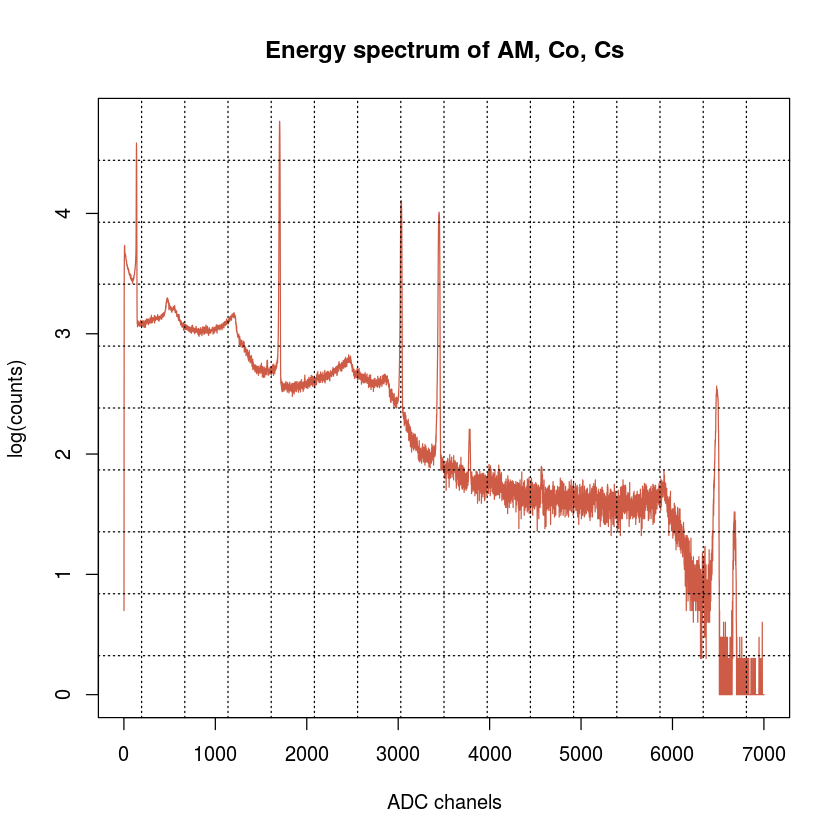

In [326]:
#plot data
data_full=read.delim("B19036_AmCsCo_20180316.dat", skip =1, header = TRUE)
data_full = c(data_full)
#data_ = as.numeric(data_)
data_full = as.numeric(unlist(data_full))
log_counts =log10(data_full)
#hist(x[0:100])
#hist(x[0:100])
clean_log = log_counts[!is.infinite(log_counts)] 
plot(clean_log, type = 'l', col='coral3', main = 'Energy spectrum of AM, Co, Cs', xlab = 'ADC chanels', ylab = "log(counts)")
grid(nx = 16, ny = 10, col = "black", lty = "dotted",lwd = par("lwd"), equilogs = FALSE)


# CUT1 [70:450]

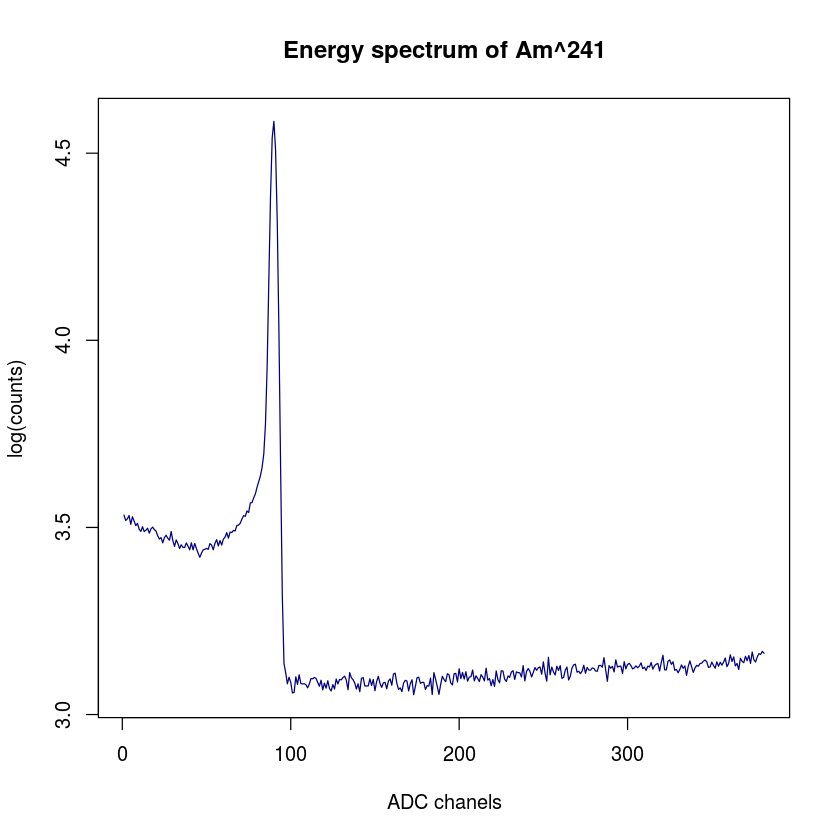

In [327]:
#first element
#
cut1 = data_full[70:450]
log_cut1 = log10(cut1)
#log_cut1 = log_counts[!is.infinite(log_cut1)] 
plot(log_cut1, type = 'l', col='navy', main = 'Energy spectrum of Am^241', xlab = 'ADC chanels', ylab = "log(counts)")

Normalize the data to apply normal distribtion:

In [328]:
maxx1 = max(cut1)
cut1 = cut1/maxx1
max_amp1 = max(log_cut1)

# Energy interpolation

energy = x

ADC = y

\$y \pm \epsilon = a x + b$


In [329]:
fit_data = NULL
x = c(59.54,661.66,1173.24,1332.51)
y = c(410,2184,3583.5,4095.5)
data$energy = x
data$adc = y
#plot(x,y, main='energy vs adc')

In [330]:
linearMod <- lm(y ~ x, data=fit_data)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = y ~ x, data = fit_data)

Coefficients:
(Intercept)            x  
    251.414        2.872  



In [331]:
summary(linearMod)
#Intercept >> b = 251.414
#coefficient a = 2.872
#R^2 is near 1, the model i a good fit


Call:
lm(formula = y ~ x, data = fit_data)

Residuals:
     1      2      3      4 
-12.40  32.39 -37.29  17.31 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 251.41400   36.23018   6.939 0.020141 *  
x             2.87186    0.03822  75.130 0.000177 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.04 on 2 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9995 
F-statistic:  5645 on 1 and 2 DF,  p-value: 0.0001771


# MCMC (normal)

In [332]:
library(rjags)

set.seed(20190522)

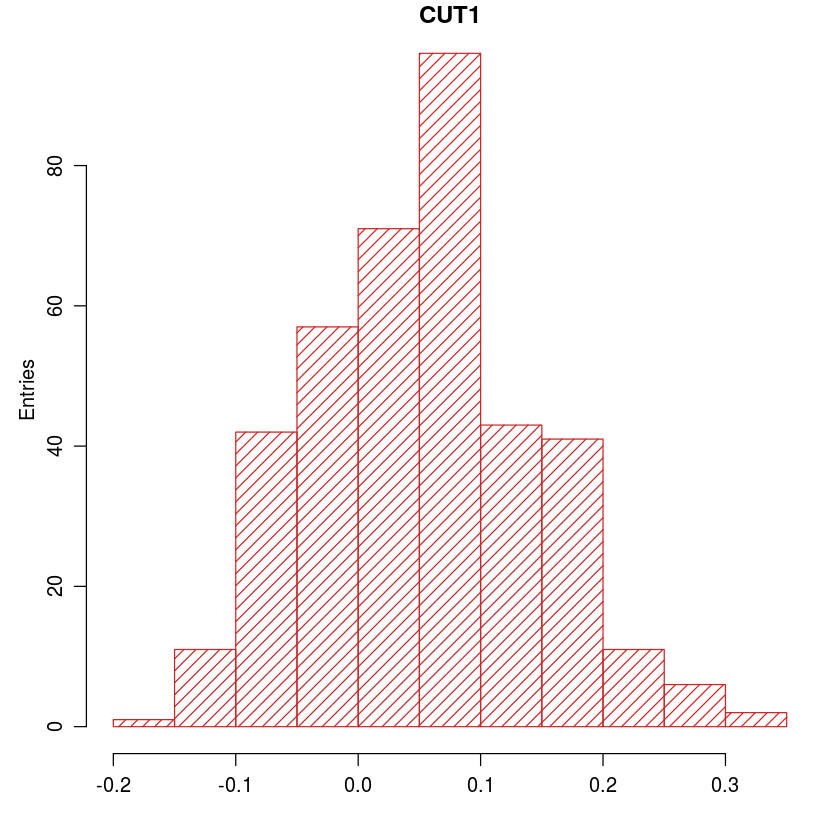

In [333]:
# Generate the observed data
data_size <- length(cut1)
data_mu <- mean(cut1)
data_sigma <- sd(cut1)
data_obs <- rnorm(data_size, data_mu, data_sigma)

data_plot <- TRUE
if (data_plot) {
  par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(data_obs, density=15, col="firebrick3",
       xlab="", ylab="Entries", main="CUT1")
}

In [334]:
model_norm <- "norm_updated.bug"

#
# # Experimental data

data <- NULL
data$X <- cut1   # Set of observations
#initials
#init <- NULL
#init$T <-4
#init$mu <- mean(cut1)
#init$sigma <- sd(cut1)


# Create the model and pass the parameters
jm <- jags.model(model_norm, data)

# Update the Markov chain (Burn-in)
update(jm, 1000)

chain <- coda.samples(jm, c("mu", "sigma","T", "Y"), n.iter=10000)

print(summary(chain))


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 381
   Unobserved stochastic nodes: 3
   Total graph size: 390

Initializing model



Warning message in FUN(X[[i]], ...):
“Failed to set trace monitor for T
Variable T not found
”


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean       SD  Naive SE Time-series SE
Y     -6.231e-05 3.298776 3.299e-02      3.299e-02
mu     5.647e-02 0.004702 4.702e-05      4.702e-05
sigma  9.157e-02 0.003325 3.325e-05      3.232e-05

2. Quantiles for each variable:

          2.5%      25%      50%     75%   97.5%
Y     -6.29307 -2.22816 -0.01595 2.21481 6.62966
mu     0.04709  0.05333  0.05653 0.05970 0.06547
sigma  0.08543  0.08930  0.09146 0.09375 0.09845



In [335]:
chain.df <- as.data.frame( as.mcmc(chain) )
mean = chain.df$mu
sgma = chain.df$sigma
pred = chain.df$Y
#chain.df$counts = exp((mean^2/sgma)^-1)*pred

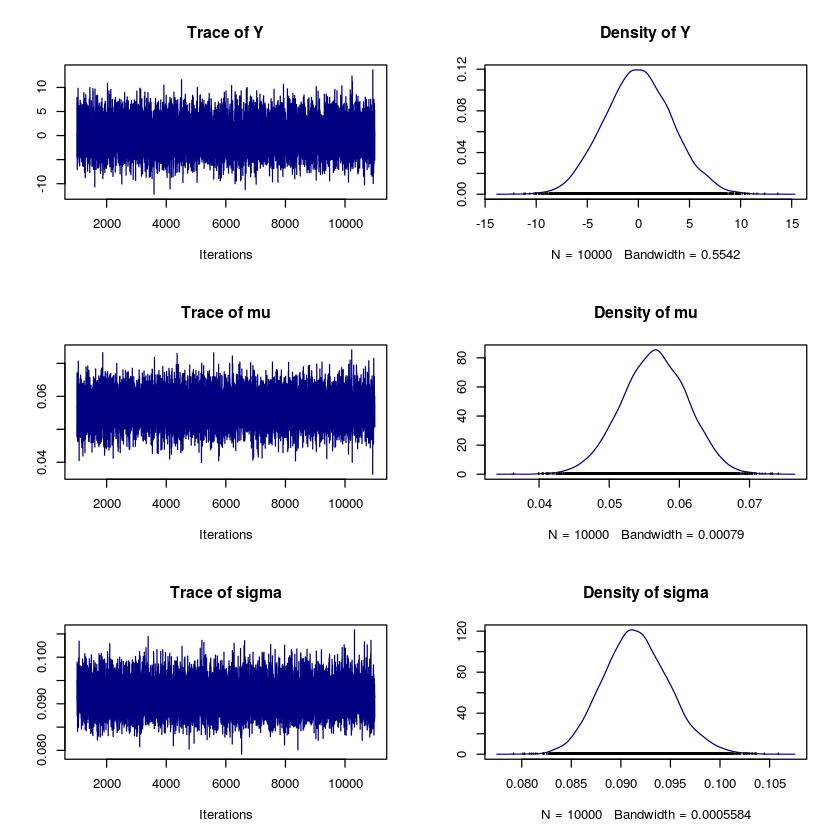

In [336]:
chain_plot <- TRUE
if (chain_plot) {
  plot(chain, col="navy")
}


 Correlation matrix: 
                 Y          mu        sigma
Y      1.000000000  0.02332441 -0.004794713
mu     0.023324406  1.00000000 -0.017764434
sigma -0.004794713 -0.01776443  1.000000000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"adjust" is not a graphical parameter”




Sample  n = 381; mean = 0.056525, sigma = 0.091604 (sigma/sqrt(n) = 0.004693)


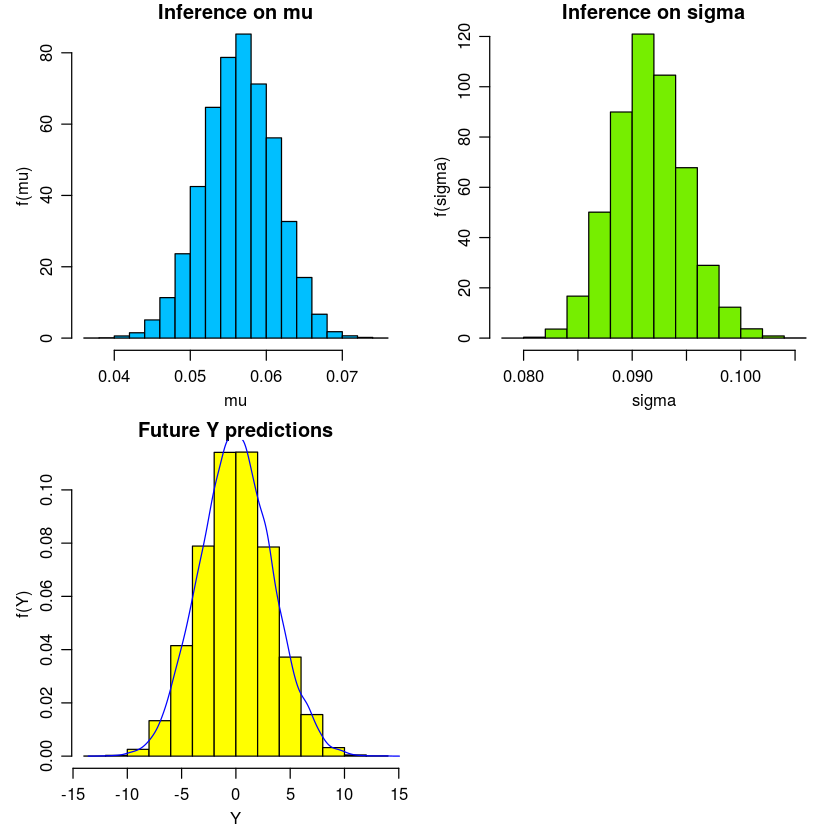

In [337]:
# Let's format our chain
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))

Y = density(chain.df$Y)

prob_plot <- TRUE
if (prob_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(chain.df$mu, prob=TRUE, col='deepskyblue1',
       xlab='mu', ylab='f(mu)', main='Inference on mu')
  hist(chain.df$sigma, prob=TRUE, col='chartreuse2',
       xlab='sigma', ylab='f(sigma)', main='Inference on sigma')
  hist(chain.df$Y, prob=TRUE, col='yellow',
       xlab='Y', ylab='f(Y)', main='Future Y predictions')
    lines(Y, adjust = 4, col = "blue")


}

cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n",
             data_size, mean(data$X), sd(data$X), sd(data$X)/sqrt(data_size) ))




Sample  n = 381; mean = 0.056525, sigma = 0.091604 (sigma/sqrt(n) = 0.004693)


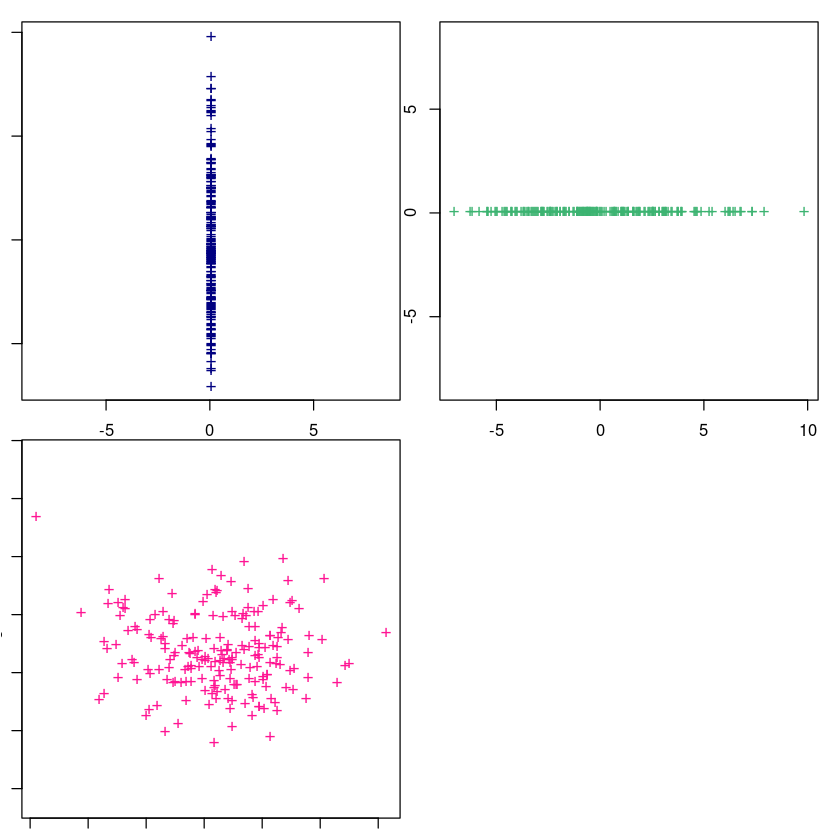

In [338]:
cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n", data_size, mean(data$X), sd(data$X), sd(data$X)/sqrt(data_size) ))

corr_plot <- TRUE
if (corr_plot) {
  par(mfrow=c(2,2), mgp=c(1,1,0), mar=c(1,1,1,1), oma=0.1*c(1,1,1,1))
  plot(chain.df$mu[1:200], chain.df$Y[1:200], xlab='mu', ylab='Y', main="",
       pch='+', col='navy', cex=1.25, asp=1)
  plot(chain.df$Y[1:200], chain.df$sigma[1:200], xlab='Y', ylab='sigma',
        main="",
       pch='+', col='mediumseagreen', cex=1.25, asp=1)
  plot(chain.df$mu[1:200], chain.df$sigma[1:200], xlab='mu', ylab='sigma',
        main="",
       pch='+', col='deeppink1', cex=1.25, asp=1)
}

# Inferred number of counts:

The number of counts is basically the area under the curve of inferred values >> Y

Americium Number of events under the source of gamma peaks is the following:

Calculate the area under density curve for values between -5 and 5 assuming the rest are part of the background

In [339]:
x = Y$x
y = Y$y
idx1 = min(which(Y$x>-5))
idx2 = max(which(Y$x<5))
idx = idx1:idx2
#area under the curve > trapazoidal
counts =(as.double( (x[idx] - x[idx-1]) %*% (y[idx] + y[idx-1])) / 2)
n_am = 10^(max_amp1)*counts
cat("Number of events of the element AM^241 under gamma source : ", n_am)

Number of events of the element AM^241 under gamma source :  33263.47

# CUT 2[1500:3200]

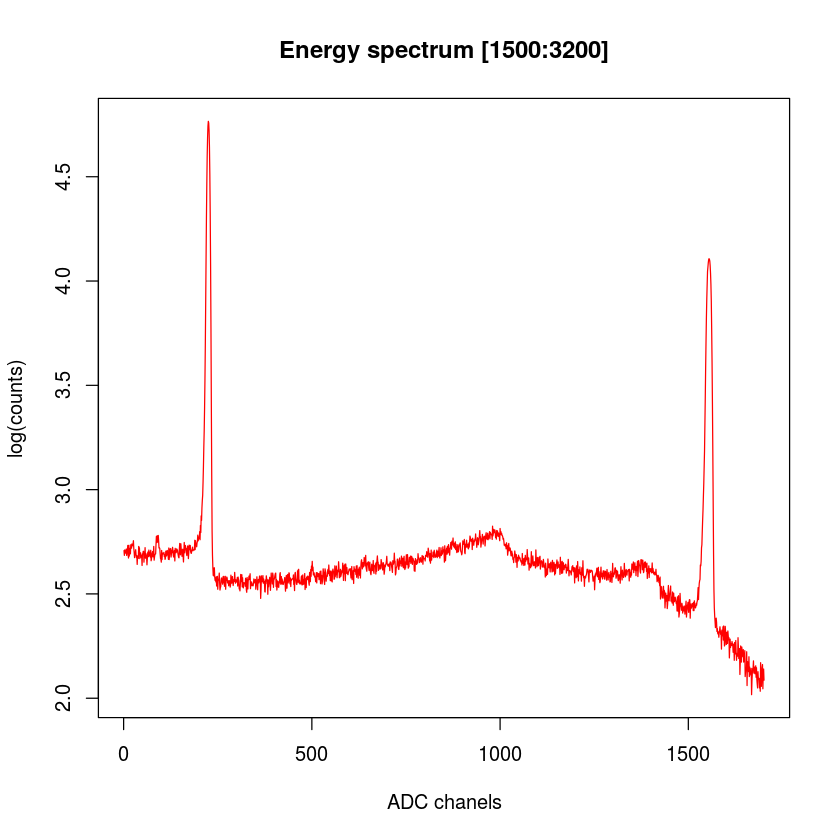

In [340]:
cut2 = data_full[1500:3200]
log_cut2 = log10(cut2)
#log_cut1 = log_counts[!is.infinite(log_cut1)] 
plot(log_cut2, type = 'l', col='red', main = 'Energy spectrum [1500:3200]', xlab = 'ADC chanels', ylab = "log(counts)")

In [341]:
cut2a = cut2[0:750]
cut2b = cut2[1200:1600]

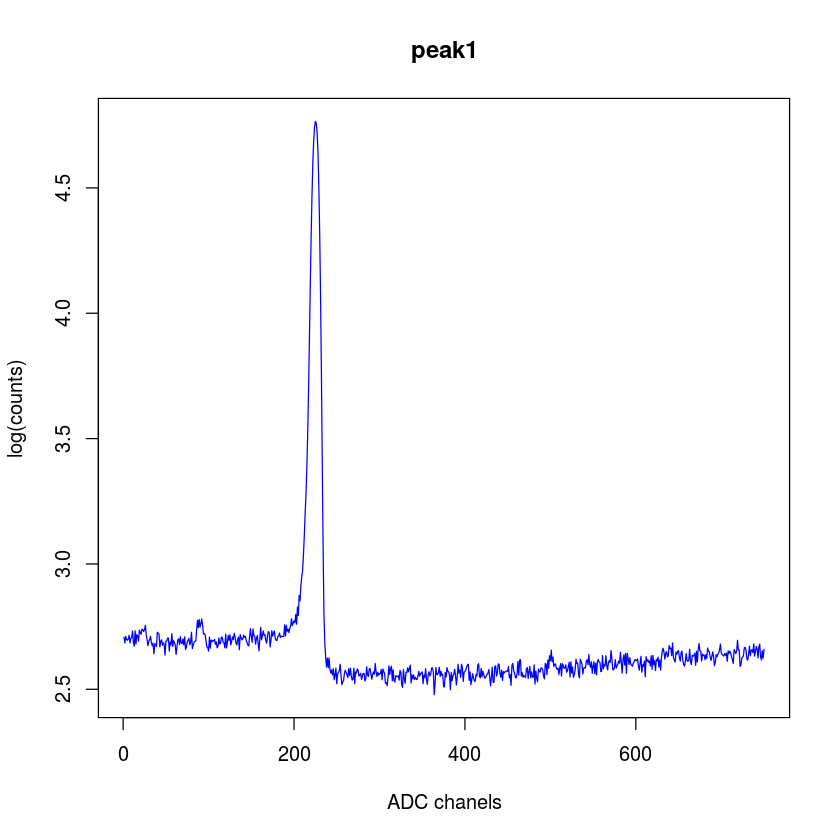

In [342]:
log_cut2a = log10(cut2a)
plot(log_cut2a, type = 'l', col='blue', main = 'peak1', xlab = 'ADC chanels', ylab = "log(counts)")

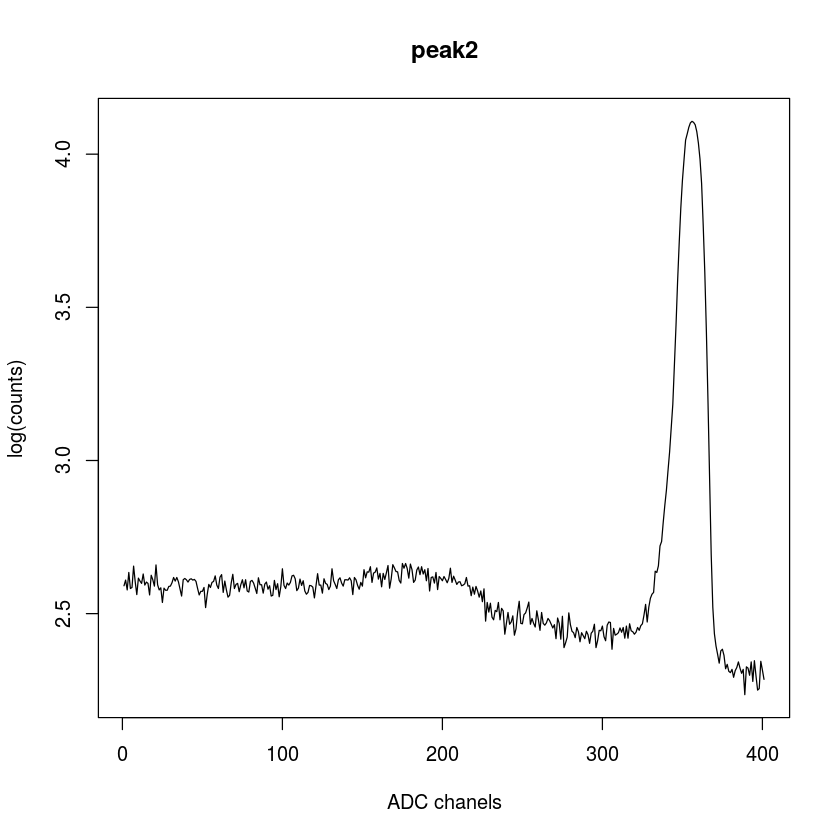

In [343]:
log_cut2b = log10(cut2b)
plot(log_cut2b, type = 'l', col='black', main = 'peak2', xlab = 'ADC chanels', ylab = "log(counts)")

In [344]:
maxx2 = max(cut2)
cut2 = cut2/maxx2
max_amp2 = max(log_cut2)

In [345]:
maxx2a = max(cut2a)
cut2a = cut2a/maxx2a
max_amp2 = max(log_cut2a)

In [346]:
maxx2b = max(cut2b)
cut2b = cut2b/maxx2b
max_amp2 = max(log_cut2b)

# MCMC normal

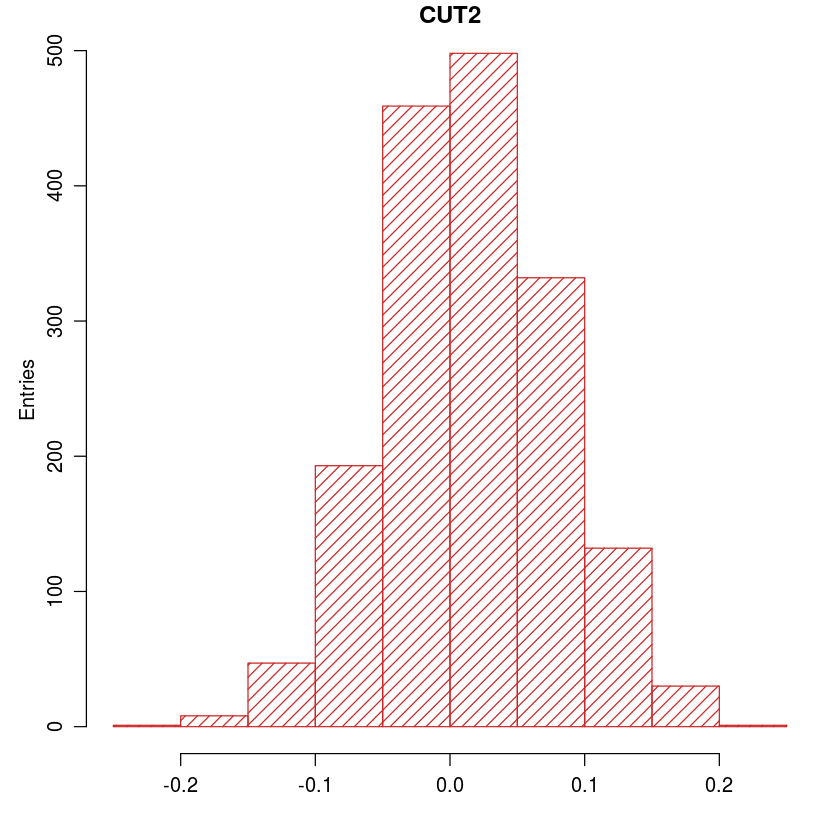

In [347]:
# Generate the observed data
data_size2 <- length(cut2)
data_mu2 <- mean(cut2)
data_sigma2 <- sd(cut2)
data_obs2 <- rnorm(data_size2, data_mu2, data_sigma2)

data_plot <- TRUE
if (data_plot) {
  par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(data_obs2, density=15, col="firebrick3",
       xlab="", ylab="Entries", main="CUT2")
}

In [348]:
model_norm <- "norm_updated.bug"

#
# # Experimental data

data2 <- NULL
data2$X <- data_obs2   # Set of observations
#initials
#init <- NULL
#init$T <-4
#init$mu <- mean(cut1)
#init$sigma <- sd(cut1)


# Create the model and pass the parameters
jm <- jags.model(model_norm, data2)

# Update the Markov chain (Burn-in)
update(jm, 1000)

chain2 <- coda.samples(jm, c("mu", "sigma", "Y"), n.iter=10000)

print(summary(chain2))


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1701
   Unobserved stochastic nodes: 3
   Total graph size: 1710

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean       SD  Naive SE Time-series SE
Y     0.07880 3.974269 3.974e-02      3.974e-02
mu    0.01494 0.001538 1.538e-05      1.505e-05
sigma 0.06340 0.001092 1.092e-05      1.092e-05

2. Quantiles for each variable:

          2.5%      25%     50%     75%   97.5%
Y     -7.68416 -2.66671 0.09629 2.74407 7.91242
mu     0.01191  0.01389 0.01494 0.01597 0.01792
sigma  0.06131  0.06266 0.06338 0.06411 0.06559



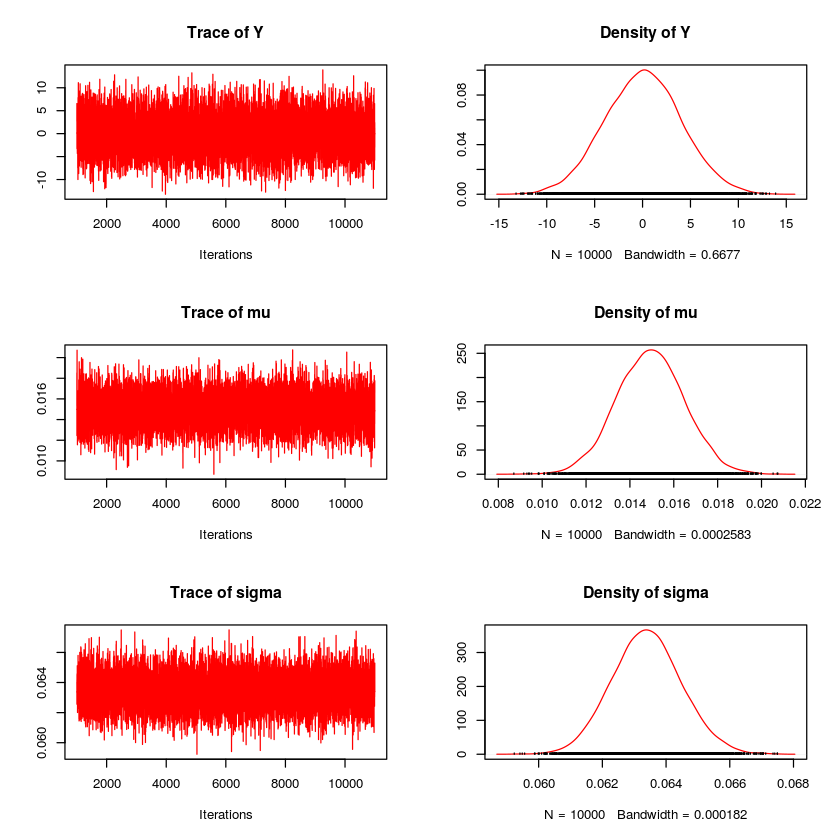

In [349]:
chain_plot <- TRUE
if (chain_plot) {
  plot(chain2, col="red")
}


 Correlation matrix: 
                 Y          mu        sigma
Y      1.000000000  0.02332441 -0.004794713
mu     0.023324406  1.00000000 -0.017764434
sigma -0.004794713 -0.01776443  1.000000000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"adjust" is not a graphical parameter”




Sample  n = 1701; mean = 0.014964, sigma = 0.063389 (sigma/sqrt(n) = 0.001537)


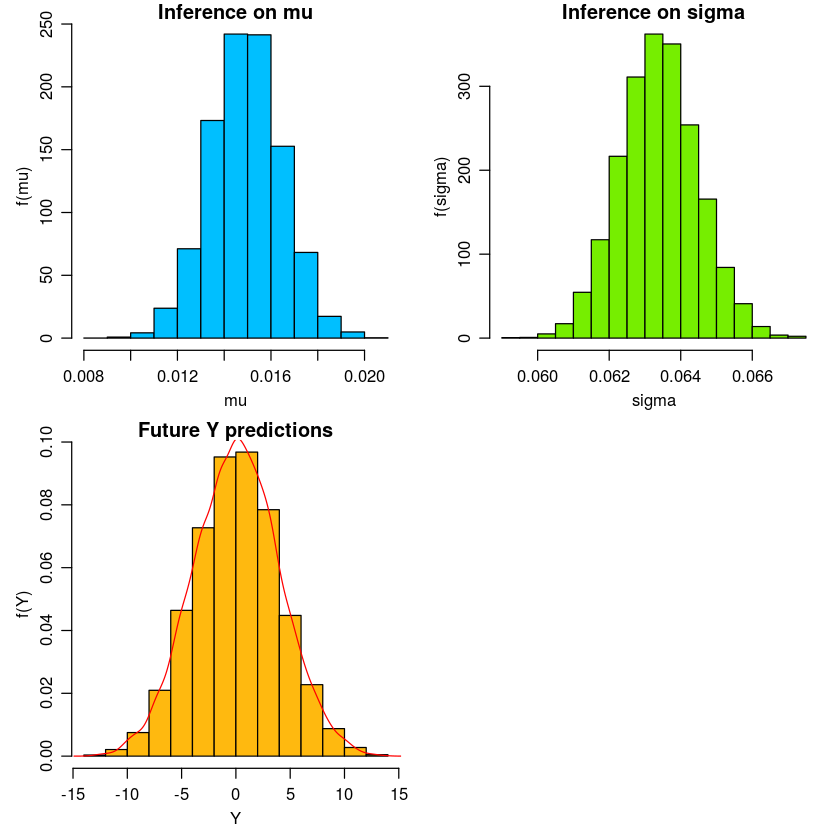

In [350]:
# Let's format our chain
chain2.df <- as.data.frame( as.mcmc(chain2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))

prob_plot <- TRUE
if (prob_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(chain2.df$mu, prob=TRUE, col='deepskyblue1',
       xlab='mu', ylab='f(mu)', main='Inference on mu')
  hist(chain2.df$sigma, prob=TRUE, col='chartreuse2',
       xlab='sigma', ylab='f(sigma)', main='Inference on sigma')
  hist(chain2.df$Y, prob=TRUE, col='darkgoldenrod1',
       xlab='Y', ylab='f(Y)', main='Future Y predictions')
    Y2 = density(chain2.df$Y)
    lines(Y2, adjust = 4, col = "red")

}

cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n",
             data_size2, mean(data2$X), sd(data2$X), sd(data2$X)/sqrt(data_size2) ))




Sample  n = 1701; mean = 0.014964, sigma = 0.063389 (sigma/sqrt(n) = 0.001537)


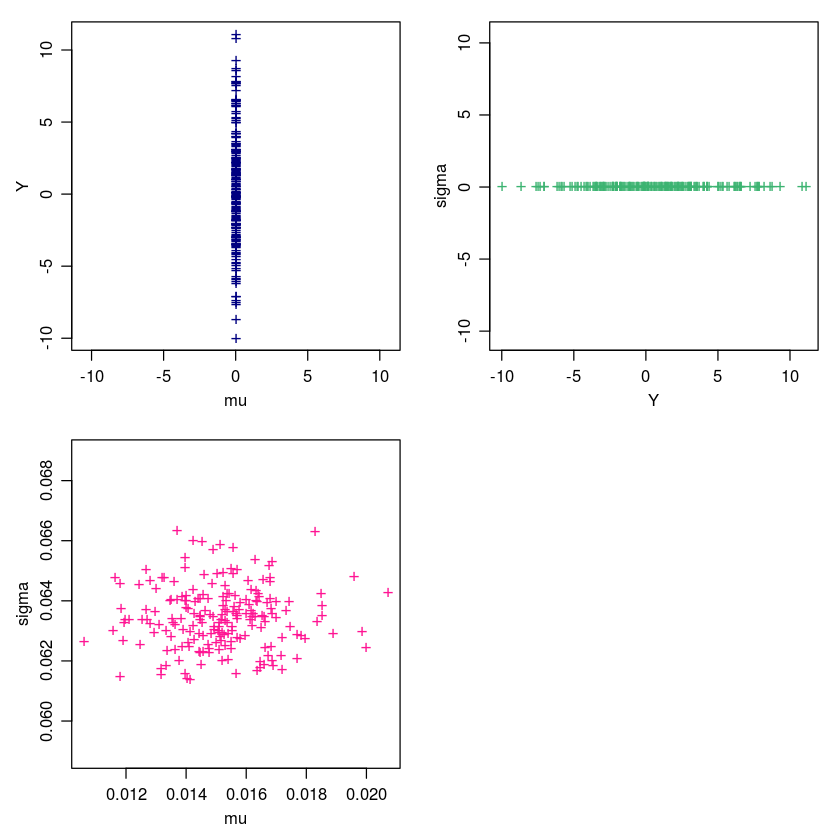

In [351]:
cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n", data_size2, mean(data2$X), sd(data2$X), sd(data2$X)/sqrt(data_size2) ))

corr_plot <- TRUE
if (corr_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  plot(chain2.df$mu[1:200], chain2.df$Y[1:200], xlab='mu', ylab='Y', main="",
       pch='+', col='navy', cex=1.25, asp=1)
  plot(chain2.df$Y[1:200], chain2.df$sigma[1:200], xlab='Y', ylab='sigma',
        main="",
       pch='+', col='mediumseagreen', cex=1.25, asp=1)
  plot(chain2.df$mu[1:200], chain2.df$sigma[1:200], xlab='mu', ylab='sigma',
        main="",
       pch='+', col='deeppink1', cex=1.25, asp=1)
}

In [352]:
x2= Y2$x
y2 = Y2$y
idx11 = min(which(Y2$x>-5))
idx22 = max(which(Y2$x<5))
idx = idx11:idx22
#area under the curve > trapazoidal
counts2 =(as.double( (x2[idx] - x2[idx-1]) %*% (y2[idx] + y2[idx-1])) / 2)
n_am2 = 10^(max_amp2)*counts2
cat("Number of events of the element Cs^137 under gamma source : ", n_am2)

Number of events of the element Cs^137 under gamma source :  10071.73

# Cut2a&b

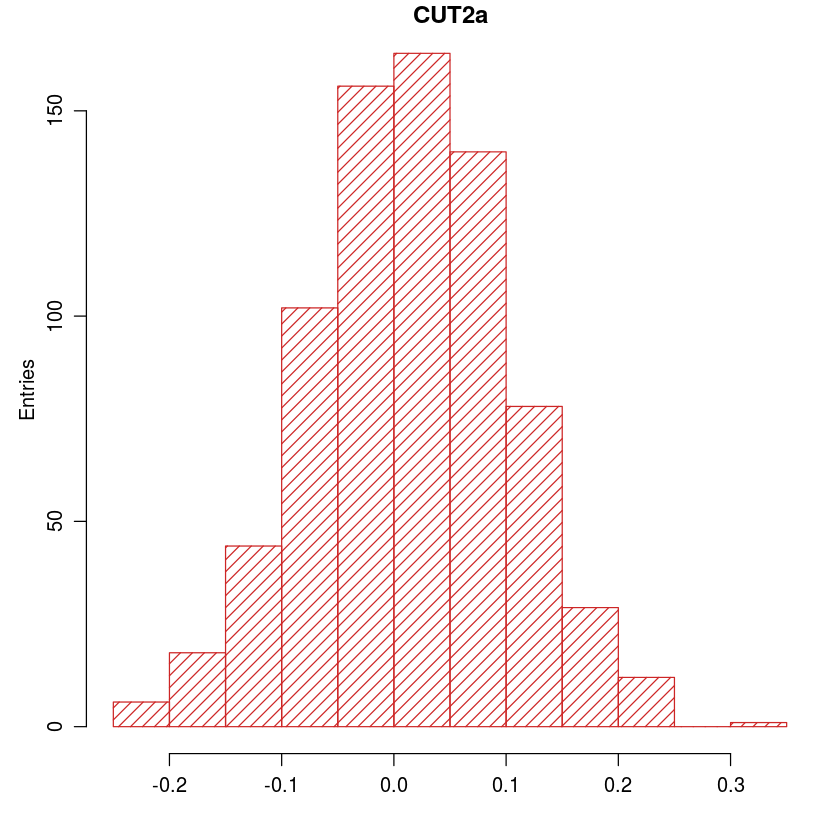

In [353]:
# Generate the observed data
data_size2a <- length(cut2a)
data_mu2a <- mean(cut2a)
data_sigma2a <- sd(cut2a)
data_obs2a <- rnorm(data_size2a, data_mu2a, data_sigma2a)

data_plot <- TRUE
if (data_plot) {
  par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(data_obs2a, density=15, col="firebrick3",
       xlab="", ylab="Entries", main="CUT2a")
}

In [354]:
model_norm <- "norm_updated.bug"

#
# # Experimental data

data2a <- NULL
data2a$X <- data_obs2a   # Set of observations
#initials
#init <- NULL
#init$T <-4
#init$mu <- mean(cut1)
#init$sigma <- sd(cut1)


# Create the model and pass the parameters
jm <- jags.model(model_norm, data2a)

# Update the Markov chain (Burn-in)
update(jm, 1000)

chain2a <- coda.samples(jm, c("mu", "sigma", "Y"), n.iter=10000)

print(summary(chain2a))


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 750
   Unobserved stochastic nodes: 3
   Total graph size: 759

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean       SD  Naive SE Time-series SE
Y     0.02029 3.396964 3.397e-02      3.397e-02
mu    0.01522 0.003163 3.163e-05      3.233e-05
sigma 0.08645 0.002213 2.213e-05      2.300e-05

2. Quantiles for each variable:

           2.5%      25%       50%     75%   97.5%
Y     -6.573605 -2.28501 -0.009949 2.32302 6.71502
mu     0.009058  0.01307  0.015195 0.01734 0.02137
sigma  0.082118  0.08494  0.086452 0.08794 0.09081




 Correlation matrix: 
                 Y          mu        sigma
Y      1.000000000  0.02332441 -0.004794713
mu     0.023324406  1.00000000 -0.017764434
sigma -0.004794713 -0.01776443  1.000000000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"adjust" is not a graphical parameter”




Sample  n = 750; mean = 0.015215, sigma = 0.086457 (sigma/sqrt(n) = 0.003157)


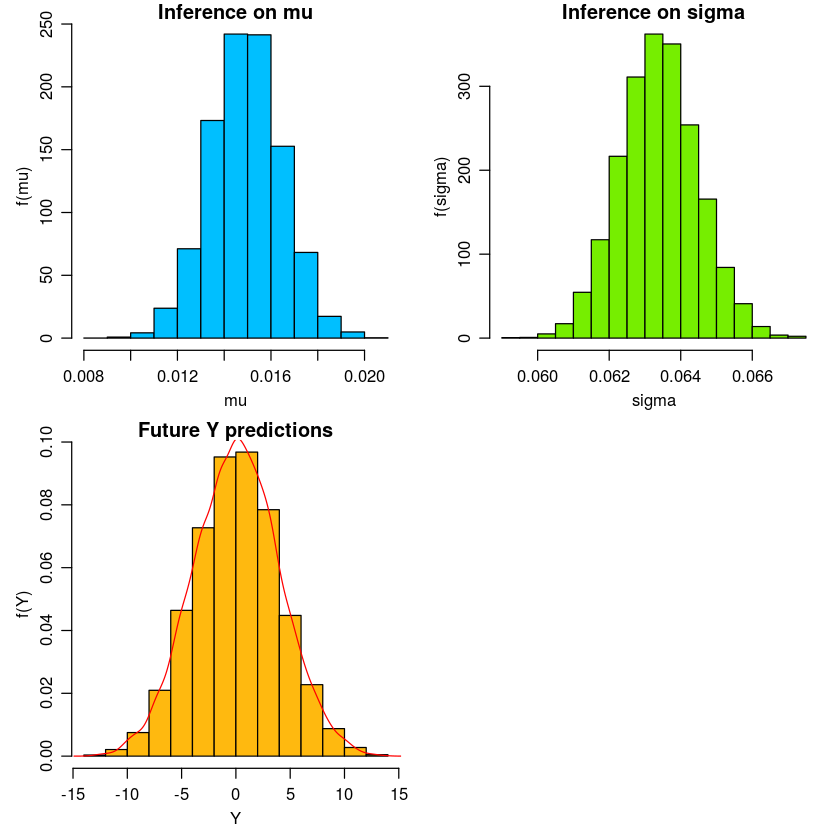

In [355]:
# Let's format our chain
chain2a.df <- as.data.frame( as.mcmc(chain2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))

prob_plot <- TRUE
if (prob_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(chain2a.df$mu, prob=TRUE, col='deepskyblue1',
       xlab='mu', ylab='f(mu)', main='Inference on mu')
  hist(chain2a.df$sigma, prob=TRUE, col='chartreuse2',
       xlab='sigma', ylab='f(sigma)', main='Inference on sigma')
  hist(chain2a.df$Y, prob=TRUE, col='darkgoldenrod1',
       xlab='Y', ylab='f(Y)', main='Future Y predictions')
    Y2a = density(chain2a.df$Y)
    lines(Y2a, adjust = 4, col = "red")

}

cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n",
             data_size2a, mean(data2a$X), sd(data2a$X), sd(data2a$X)/sqrt(data_size2a) ))

In [356]:
x2a= Y2a$x
y2a = Y2a$y
idx11a = min(which(Y2a$x>-5))
idx22a = max(which(Y2a$x<5))
idx = idx11:idx22
#area under the curve > trapazoidal
counts2a =(as.double( (x2a[idx] - x2a[idx-1]) %*% (y2a[idx] + y2a[idx-1])) / 2)
n_am2a = 10^(max_amp2)*counts2a
cat("Number of events of the element Cs^137 under gamma source : ", n_am2a)

Number of events of the element Cs^137 under gamma source :  10071.73

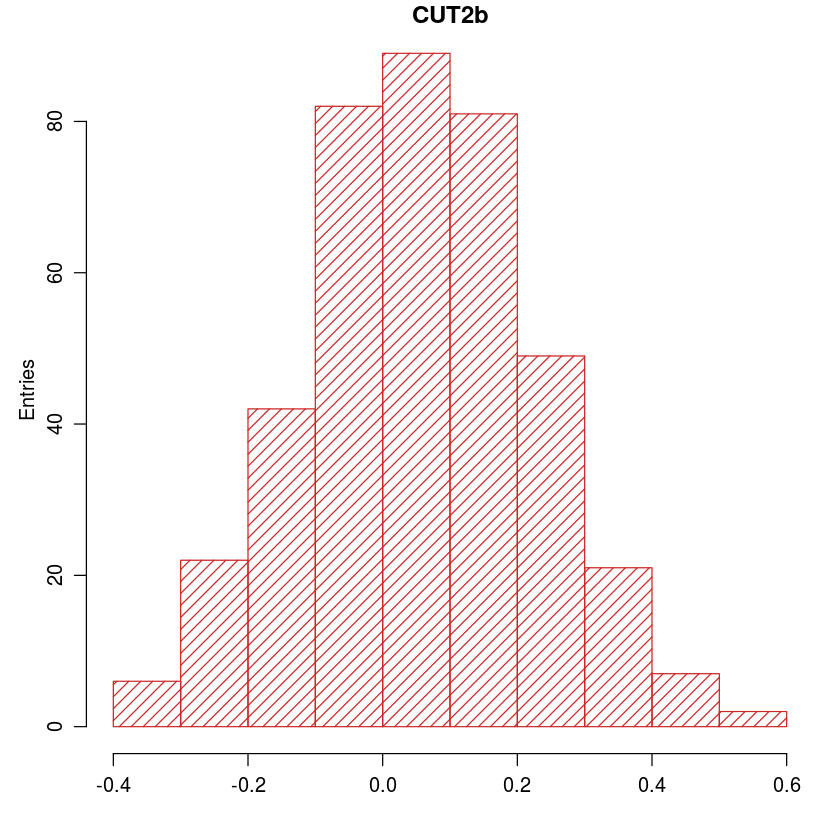

In [357]:
# Generate the observed data
data_size2b <- length(cut2b)
data_mu2b <- mean(cut2b)
data_sigma2b <- sd(cut2b)
data_obs2b <- rnorm(data_size2b, data_mu2b, data_sigma2b)

data_plot <- TRUE
if (data_plot) {
  par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(data_obs2b, density=15, col="firebrick3",
       xlab="", ylab="Entries", main="CUT2b")
}

In [358]:
model_norm <- "norm_updated.bug"

#
# # Experimental data

data2b <- NULL
data2b$X <- data_obs2b  # Set of observations
#initials
#init <- NULL
#init$T <-4
#init$mu <- mean(cut1)
#init$sigma <- sd(cut1)


# Create the model and pass the parameters
jm <- jags.model(model_norm, data2b)

# Update the Markov chain (Burn-in)
update(jm, 1000)

chain2b <- coda.samples(jm, c("mu", "sigma", "Y"), n.iter=10000)

print(summary(chain2b))


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 401
   Unobserved stochastic nodes: 3
   Total graph size: 410

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean       SD  Naive SE Time-series SE
Y     0.06542 2.413955 2.414e-02      2.455e-02
mu    0.05514 0.008633 8.633e-05      8.783e-05
sigma 0.17139 0.006052 6.052e-05      6.052e-05

2. Quantiles for each variable:

         2.5%      25%     50%     75%  97.5%
Y     -4.5865 -1.55588 0.06267 1.67595 4.7891
mu     0.0380  0.04944 0.05510 0.06085 0.0720
sigma  0.1602  0.16716 0.17121 0.17541 0.1836




 Correlation matrix: 
                 Y          mu        sigma
Y      1.000000000  0.02332441 -0.004794713
mu     0.023324406  1.00000000 -0.017764434
sigma -0.004794713 -0.01776443  1.000000000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"adjust" is not a graphical parameter”




Sample  n = 401; mean = 0.055358, sigma = 0.171435 (sigma/sqrt(n) = 0.008561)


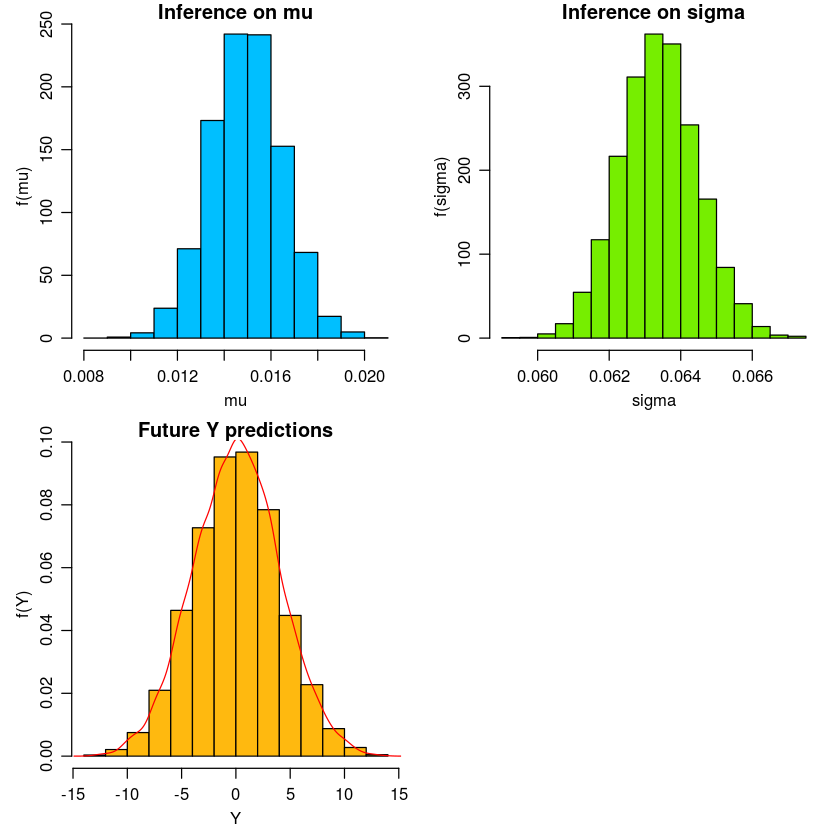

In [359]:
# Let's format our chain
chain2b.df <- as.data.frame( as.mcmc(chain2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))

prob_plot <- TRUE
if (prob_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(chain2b.df$mu, prob=TRUE, col='deepskyblue1',
       xlab='mu', ylab='f(mu)', main='Inference on mu')
  hist(chain2b.df$sigma, prob=TRUE, col='chartreuse2',
       xlab='sigma', ylab='f(sigma)', main='Inference on sigma')
  hist(chain2b.df$Y, prob=TRUE, col='darkgoldenrod1',
       xlab='Y', ylab='f(Y)', main='Future Y predictions')
    Y2b = density(chain2b.df$Y)
    lines(Y2b, adjust = 4, col = "red")

}

cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n",
             data_size2b, mean(data2b$X), sd(data2b$X), sd(data2b$X)/sqrt(data_size2b) ))

In [360]:
x2b= Y2b$x
y2b = Y2b$y
idx11a = min(which(Y2b$x>-5))
idx22b = max(which(Y2b$x<5))
idx = idx11:idx22
#area under the curve > trapazoidal
counts2b =(as.double( (x2b[idx] - x2b[idx-1]) %*% (y2b[idx] + y2b[idx-1])) / 2)
n_am2b = 10^(max_amp2)*counts2b
cat("Number of events of the element Cs^137 under gamma source : ", n_am2b)

Number of events of the element Cs^137 under gamma source :  10071.73

#  CUT3 [3200:4500]

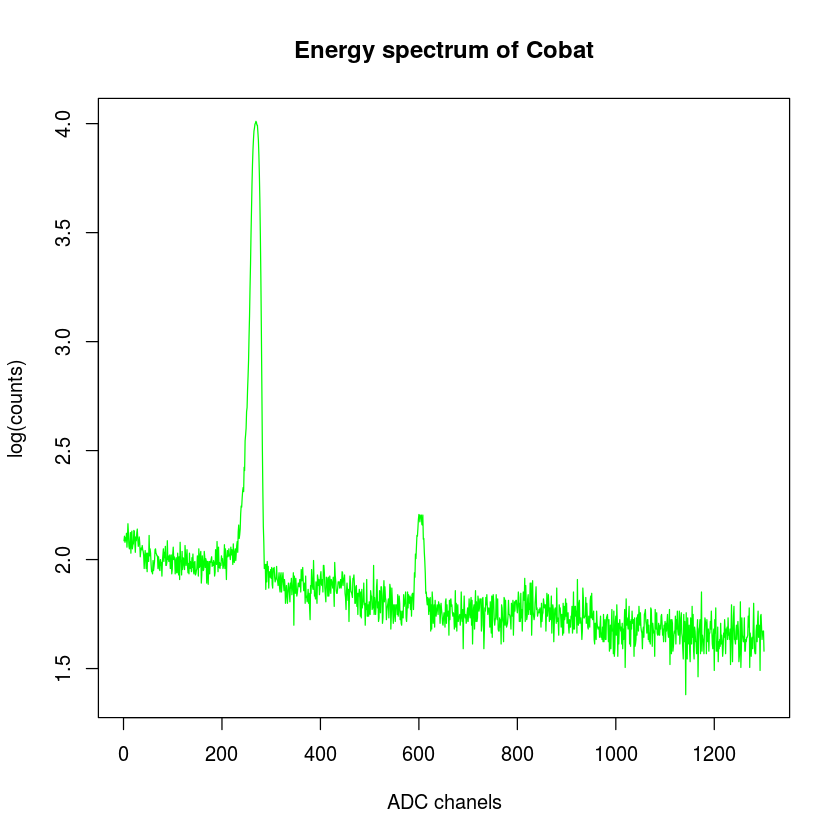

In [361]:
cut3 = data_full[3200:4500]
log_cut3 = log10(cut3)
#log_cut1 = log_counts[!is.infinite(log_cut1)] 
plot(log_cut3, type = 'l', col='green', main = 'Energy spectrum of Cobat', xlab = 'ADC chanels', ylab = "log(counts)")

In [362]:
maxx3 = max(cut3)
cut3 = cut3/maxx3
max_amp3 = max(log_cut3)
maxx3

[1] 10248

# MCMC (normal)

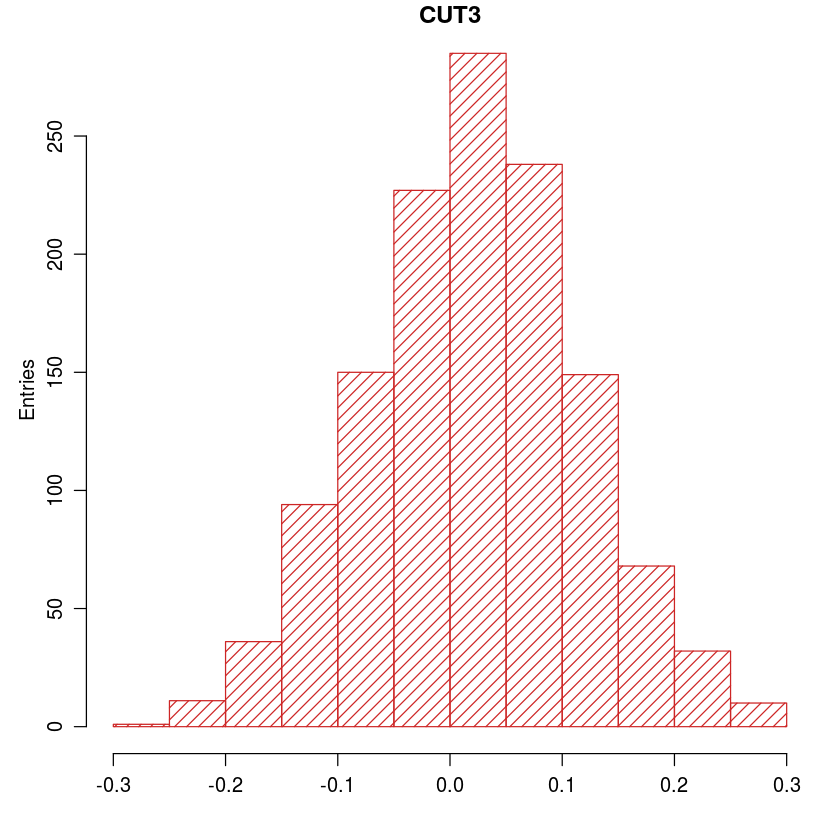

In [363]:
# Generate the observed data
data_size3 <- length(cut3)
data_mu3 <- mean(cut3)
data_sigma3 <- sd(cut3)
data_obs3 <- rnorm(data_size3, data_mu3, data_sigma3)

data_plot <- TRUE
if (data_plot) {
  par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(data_obs3, density=15, col="firebrick3",
       xlab="", ylab="Entries", main="CUT3")
}

In [364]:
model_norm <- "norm_updated.bug"

#
# # Experimental data

data3<- NULL
data3$X <- data_obs3   # Set of observations
#initials
#init <- NULL
#init$T <-4
#init$mu <- mean(cut1)
#init$sigma <- sd(cut1)


# Create the model and pass the parameters
jm <- jags.model(model_norm, data3)

# Update the Markov chain (Burn-in)
update(jm, 1000)

chain3 <- coda.samples(jm, c("mu", "sigma", "Y"), n.iter=10000)

print(summary(chain3))


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1301
   Unobserved stochastic nodes: 3
   Total graph size: 1310

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean       SD  Naive SE Time-series SE
Y     0.02557 3.249842 3.250e-02      3.250e-02
mu    0.02154 0.002631 2.631e-05      2.631e-05
sigma 0.09465 0.001833 1.833e-05      1.894e-05

2. Quantiles for each variable:

          2.5%      25%      50%     75%   97.5%
Y     -6.28901 -2.13684 0.004989 2.22212 6.40977
mu     0.01640  0.01979 0.021562 0.02335 0.02661
sigma  0.09106  0.09342 0.094629 0.09587 0.09829



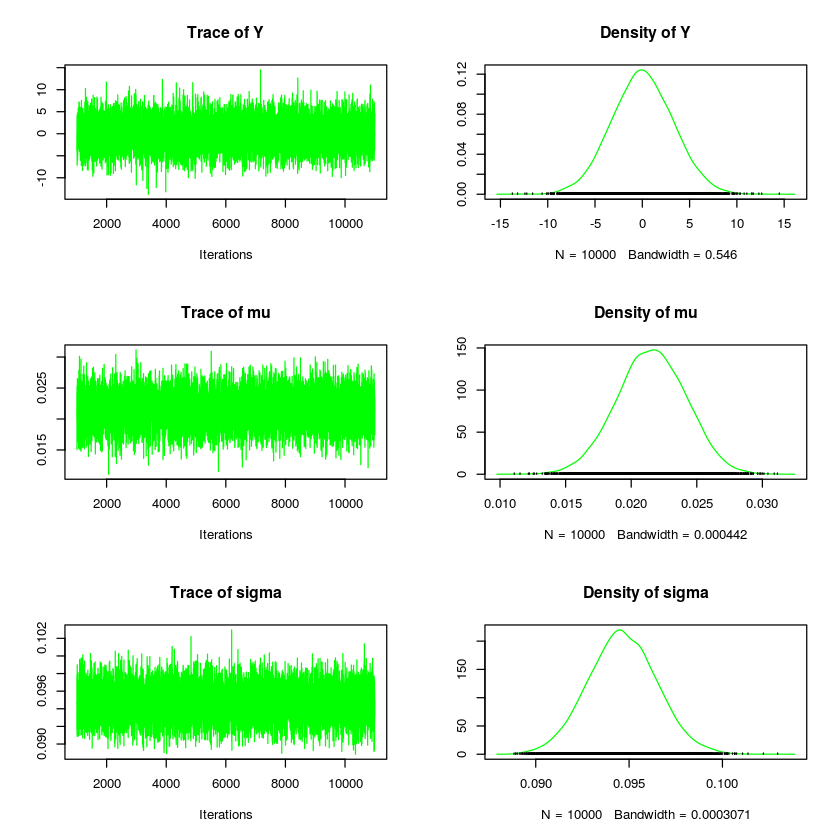

In [365]:
chain_plot <- TRUE
if (chain_plot) {
  plot(chain3, col="green")
}


 Correlation matrix: 
                Y           mu        sigma
Y      1.00000000 -0.015395515 -0.013682552
mu    -0.01539552  1.000000000 -0.008245883
sigma -0.01368255 -0.008245883  1.000000000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"adjust" is not a graphical parameter”




Sample  n = 1301; mean = 0.021532, sigma = 0.094710 (sigma/sqrt(n) = 0.002626)


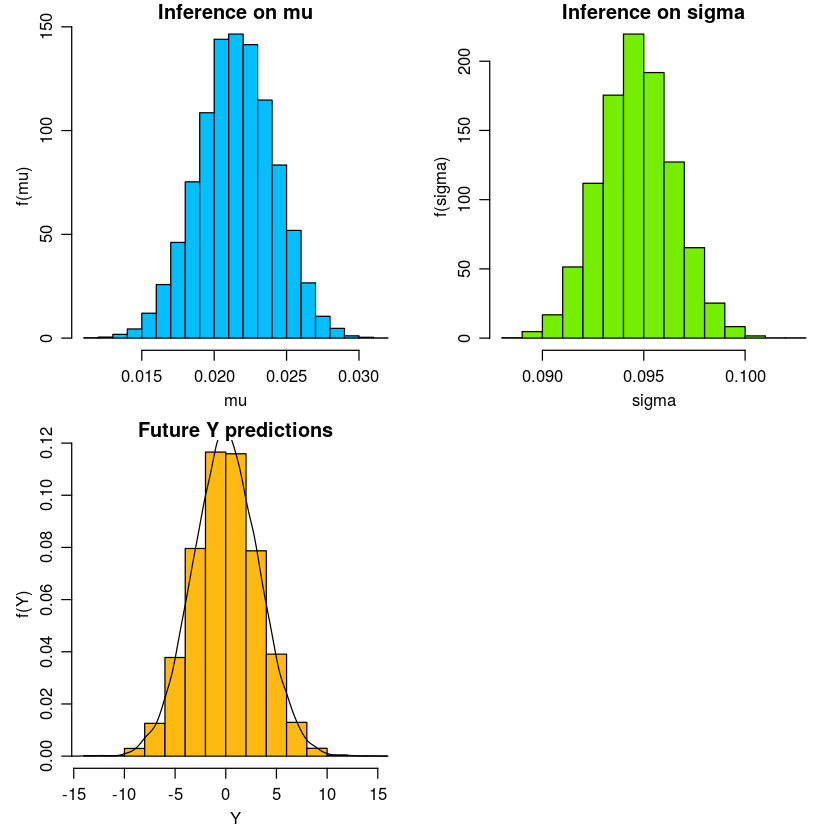

In [366]:
# Let's format our chain
chain3.df <- as.data.frame( as.mcmc(chain3) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain3.df))

prob_plot <- TRUE
if (prob_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(chain3.df$mu, prob=TRUE, col='deepskyblue1',
       xlab='mu', ylab='f(mu)', main='Inference on mu')
  hist(chain3.df$sigma, prob=TRUE, col='chartreuse2',
       xlab='sigma', ylab='f(sigma)', main='Inference on sigma')
  hist(chain3.df$Y, prob=TRUE, col='darkgoldenrod1',
       xlab='Y', ylab='f(Y)', main='Future Y predictions')
    Y3 = density(chain3.df$Y)
    lines(Y3, adjust = 4, col = "black")

}

cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n",
             data_size3, mean(data3$X), sd(data3$X), sd(data3$X)/sqrt(data_size3) ))




Sample  n = 1301; mean = 0.021532, sigma = 0.094710 (sigma/sqrt(n) = 0.002626)


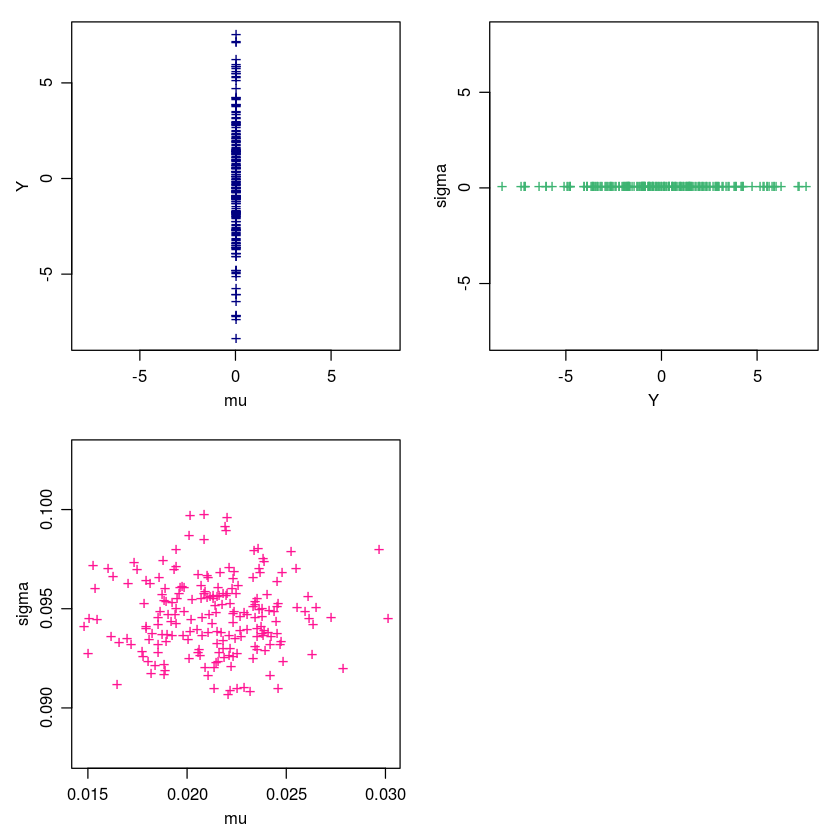

In [367]:
cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n", data_size3, mean(data3$X), sd(data3$X), sd(data3$X)/sqrt(data_size3) ))

corr_plot <- TRUE
if (corr_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  plot(chain3.df$mu[1:200], chain3.df$Y[1:200], xlab='mu', ylab='Y', main="",
       pch='+', col='navy', cex=1.25, asp=1)
  plot(chain3.df$Y[1:200], chain3.df$sigma[1:200], xlab='Y', ylab='sigma',
        main="",
       pch='+', col='mediumseagreen', cex=1.25, asp=1)
  plot(chain3.df$mu[1:200], chain3.df$sigma[1:200], xlab='mu', ylab='sigma',
        main="",
       pch='+', col='deeppink1', cex=1.25, asp=1)
}

In [368]:
x3= Y3$x
y3 = Y3$y
idx111 = min(which(Y3$x>-7))
idx222 = max(which(Y3$x<7))
idx = idx11:idx22
#area under the curve > trapazoidal
counts3 =(as.double( (x3[idx] - x3[idx-1]) %*% (y3[idx] + y3[idx-1])) / 2)
n_am3 = 10^(max_amp3)*counts3
cat("Number of events of the element Co^60 under gamma source : ", n_am3)

Number of events of the element Co^60 under gamma source :  9025.953

In [369]:
max_amp3

[1] 4.010639

#  CUT4: [4500:7000] >> Background

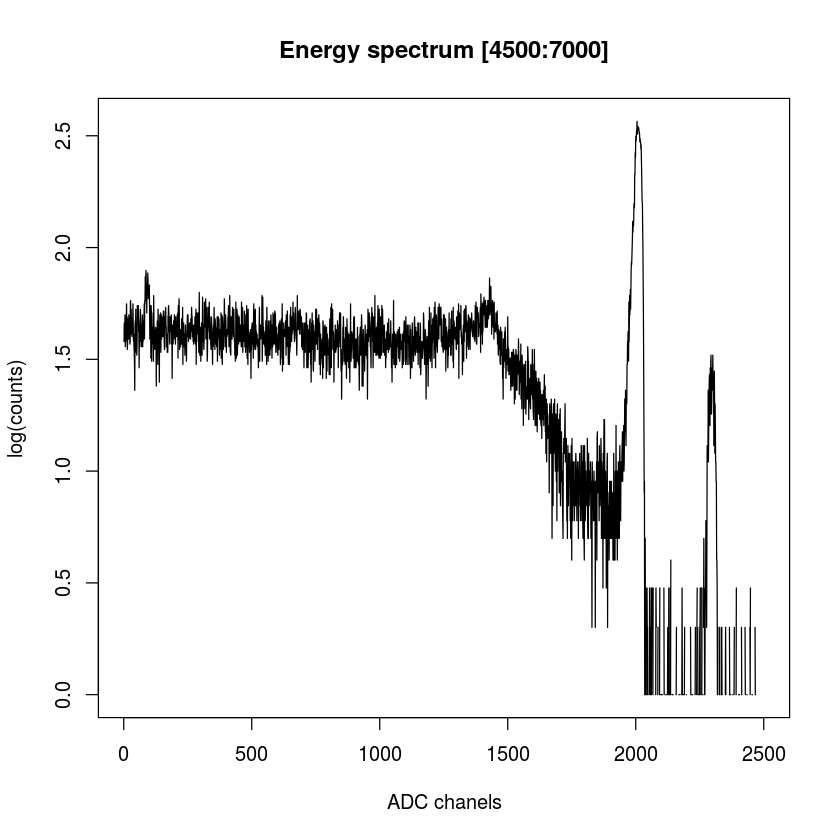

In [374]:
cut4 = data_full[4500:7000]
log_cut4 = log10(cut4)
#log_cut1 = log_counts[!is.infinite(log_cut1)] 
plot(log_cut4, type = 'l', col='black', main = 'Energy spectrum [4500:7000]', xlab = 'ADC chanels', ylab = "log(counts)")

In [389]:
maxx4 = max(cut4)
cut4 = cut4/maxx4
max_amp4= max(log_cut4)

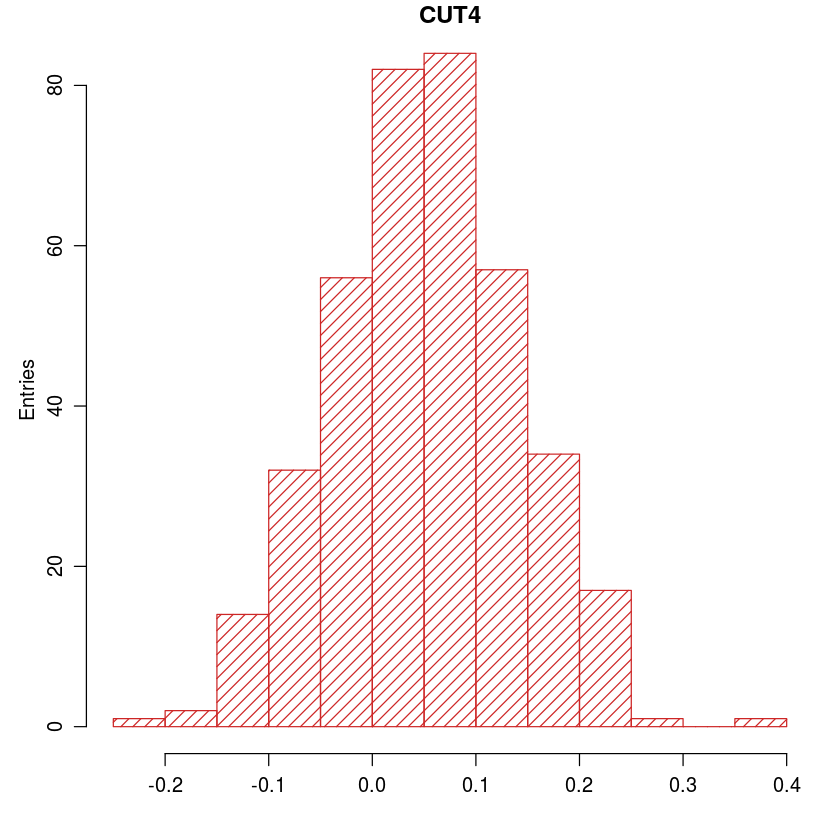

In [390]:
# Generate the observed data
data_size4 <- length(cut4)
data_mu4 <- mean(cut4)
data_sigma4 <- sd(cut4)
data_obs4 <- rnorm(data_size4, data_mu4, data_sigma4)

data_plot <- TRUE
if (data_plot) {
  par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(data_obs4, density=15, col="firebrick3",
       xlab="", ylab="Entries", main="CUT4")
}

In [391]:
model_norm <- "norm_updated.bug"

#
# # Experimental data

data4<- NULL
data4$X <- data_obs4   # Set of observations
#initials
#init <- NULL
#init$T <-4
#init$mu <- mean(cut1)
#init$sigma <- sd(cut1)


# Create the model and pass the parameters
jm <- jags.model(model_norm, data4)

# Update the Markov chain (Burn-in)
update(jm, 1000)

chain4 <- coda.samples(jm, c("mu", "sigma", "Y"), n.iter=10000)

print(summary(chain4))


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 381
   Unobserved stochastic nodes: 3
   Total graph size: 390

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean       SD  Naive SE Time-series SE
Y     0.06294 3.367968 3.368e-02      3.368e-02
mu    0.05228 0.004468 4.468e-05      4.536e-05
sigma 0.08798 0.003174 3.174e-05      3.174e-05

2. Quantiles for each variable:

          2.5%      25%     50%     75%   97.5%
Y     -6.45621 -2.21921 0.07915 2.31426 6.63273
mu     0.04339  0.04925 0.05230 0.05531 0.06079
sigma  0.08193  0.08580 0.08789 0.09007 0.09434



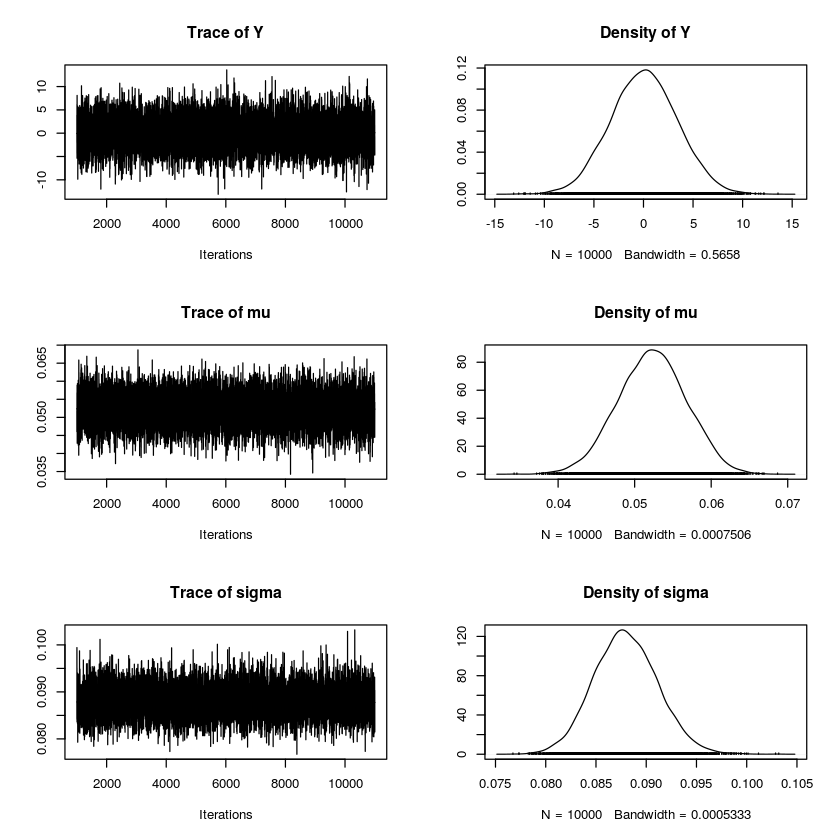

In [392]:
chain_plot <- TRUE
if (chain_plot) {
  plot(chain4, col="black")
}


 Correlation matrix: 
                 Y           mu        sigma
Y      1.000000000 -0.002066221  0.011198482
mu    -0.002066221  1.000000000 -0.009441814
sigma  0.011198482 -0.009441814  1.000000000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"adjust" is not a graphical parameter”




Sample  n = 381; mean = 0.052198, sigma = 0.088087 (sigma/sqrt(n) = 0.004513)


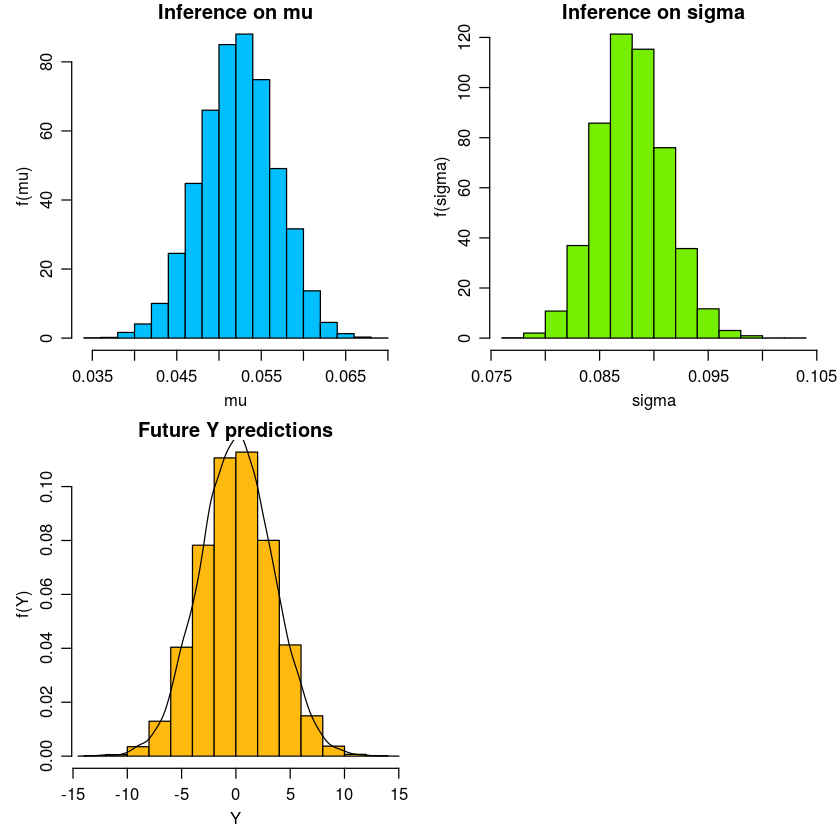

In [393]:
# Let's format our chain
chain4.df <- as.data.frame( as.mcmc(chain4) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain4.df))

prob_plot <- TRUE
if (prob_plot) {
  par(mfrow=c(2,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  hist(chain4.df$mu, prob=TRUE, col='deepskyblue1',
       xlab='mu', ylab='f(mu)', main='Inference on mu')
  hist(chain4.df$sigma, prob=TRUE, col='chartreuse2',
       xlab='sigma', ylab='f(sigma)', main='Inference on sigma')
  hist(chain4.df$Y, prob=TRUE, col='darkgoldenrod1',
       xlab='Y', ylab='f(Y)', main='Future Y predictions')
    Y_bk = density(chain4.df$Y)
    lines(Y_bk, adjust = 4, col = "black")
}

cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n",
             data_size4, mean(data4$X), sd(data4$X), sd(data4$X)/sqrt(data_size4) ))




Sample  n = 381; mean = 0.052198, sigma = 0.088087 (sigma/sqrt(n) = 0.004513)


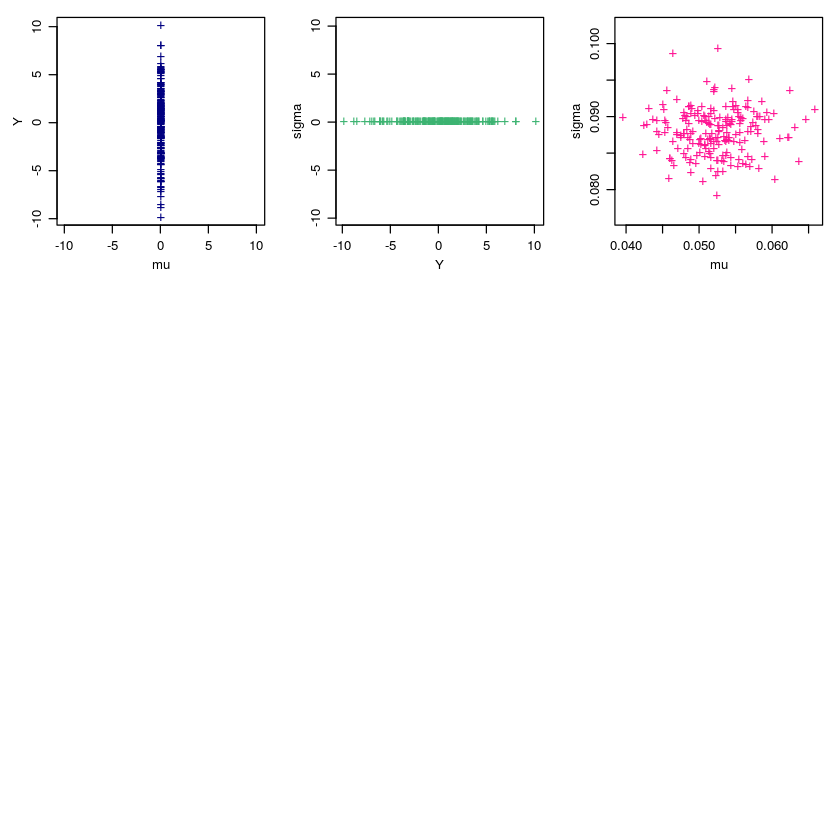

In [394]:
cat( sprintf("\n\n\nSample  n = %d; mean = %f, sigma = %f (sigma/sqrt(n) = %f)\n", data_size4, mean(data4$X), sd(data4$X), sd(data4$X)/sqrt(data_size4) ))

corr_plot <- TRUE
if (corr_plot) {
  par(mfrow=c(3,3), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  plot(chain4.df$mu[1:200], chain4.df$Y[1:200], xlab='mu', ylab='Y', main="",
       pch='+', col='navy', cex=1.25, asp=1)
  plot(chain4.df$Y[1:200], chain4.df$sigma[1:200], xlab='Y', ylab='sigma',
        main="",
       pch='+', col='mediumseagreen', cex=1.25, asp=1)
  plot(chain4.df$mu[1:200], chain4.df$sigma[1:200], xlab='mu', ylab='sigma',
        main="",
       pch='+', col='deeppink1', cex=1.25, asp=1)
}